In [1]:
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
import glob
# import imutils
# from imutils import paths
import os
import os.path

captcha_image = "data/img.png"
image = cv2.imread(captcha_image)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

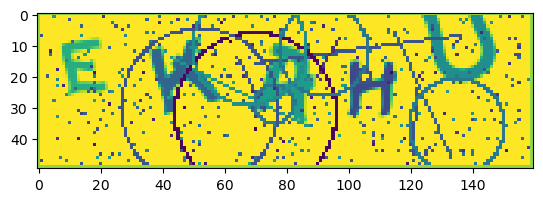

In [2]:
plt.imshow(gray)
plt.show()

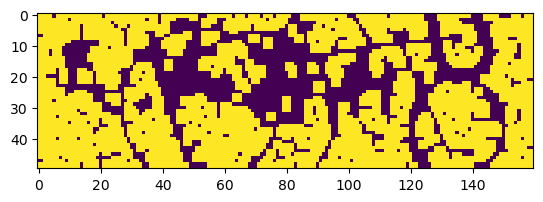

In [3]:
_, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
opened = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)

output = cv2.connectedComponentsWithStats(opened, 8, cv2.CV_32S)

min_area = 5
for i in range(1, output[0]):
    if output[2][i][4] < min_area:
        opened[output[1] == i] = 0

plt.imshow(opened)
plt.show()

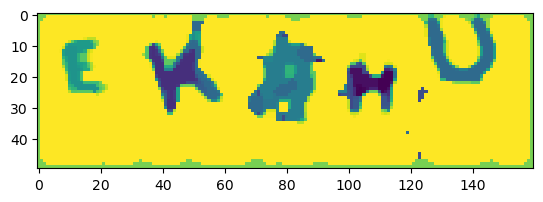

In [30]:
blur = cv2.medianBlur(gray, 5)
kernel = np.ones((3, 3), np.uint8)
erosion = cv2.erode(blur, kernel, iterations=1)
output = cv2.dilate(erosion, kernel, iterations=1)

plt.imshow(output)
# plt.imshow(out_binary)
plt.show()

In [5]:
kernel

array([[1, 1, 1],
       [1, 1, 1],
       [1, 1, 1]], dtype=uint8)

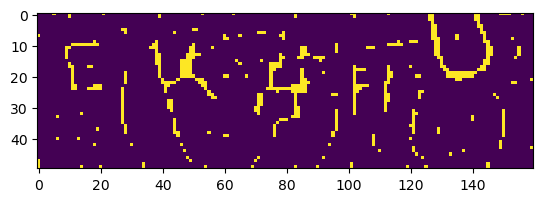

In [38]:
# Apply Gaussian Blur to reduce noise
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Apply adaptive thresholding
thresh = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2)

# Define a structuring element for erosion (a small square kernel in this case)
kernel = np.ones((3,3), np.uint8)

# Apply erosion to remove small dots
cleaned_image = cv2.erode(thresh, kernel, iterations=1)


plt.imshow(cleaned_image)
plt.show()